In [1]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import os
import imageio
from IPython.display import Image

In [2]:
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/X.npy
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/Y.npy
x = np.load('X.npy')
y = np.load('Y.npy')
print(x.shape,y.shape)

--2023-11-30 21:06:41--  https://maxime-devanne.com/datasets/MSRAction3D/X.npy
Resolving maxime-devanne.com (maxime-devanne.com)... 213.186.33.4, 2001:41d0:1:1b00:213:186:33:4
Connecting to maxime-devanne.com (maxime-devanne.com)|213.186.33.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10342208 (9.9M)
Saving to: ‘X.npy’

X.npy               100%[===================>]   9.86M  9.94MB/s    in 1.0s    

2023-11-30 21:06:43 (9.94 MB/s) - ‘X.npy’ saved [10342208/10342208]

--2023-11-30 21:06:43--  https://maxime-devanne.com/datasets/MSRAction3D/Y.npy
Resolving maxime-devanne.com (maxime-devanne.com)... 213.186.33.4, 2001:41d0:1:1b00:213:186:33:4
Connecting to maxime-devanne.com (maxime-devanne.com)|213.186.33.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4664 (4.6K)
Saving to: ‘Y.npy’

Y.npy               100%[===================>]   4.55K  --.-KB/s    in 0s      

2023-11-30 21:06:43 (101 MB/s) - ‘Y.npy’ saved [4664/4664]

(567, 3

In [3]:
# function to create a new directory
def create_directory(directory_path):
    if os.path.exists(directory_path):
        return None
    else:
        try:
            os.makedirs(directory_path)
        except:
            # in case another machine created the path meanwhile !:(
            return None
        return directory_path

# function to plot limbs according to Kinect V1 skeleton
# parmas: Axes3D ax, X coordinates jointsX, Y coordinates jointsY, Z coordinates jointsZ
def plot_limbs(ax, jointsX, jointsY, jointsZ):
    indexes = [19, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [0, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [1, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [0, 7]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [7, 9]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [9, 11]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [1, 8]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [8, 10]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [10, 12]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [2, 3]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [3, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [4, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [5, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [4, 13]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [13, 15]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [15, 17]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [5, 14]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [14, 16]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [16, 18]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')


# function to show the sequence (in fact it saves all frames as images and then create a gif of the animation)
def plot_skel(x, idx_to_plot):
    seq = x[idx_to_plot]
    out_root_dir = 'out_/'
    out_pngs_dir = out_root_dir + 'pngs/' + str(idx_to_plot) + '/'
    out_gifs_dir = out_root_dir + 'gifs/'
    create_directory(out_pngs_dir)
    create_directory(out_gifs_dir)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=23., azim=-110)
    file_names = []
    numJoints=20
    dim=3
    for i in range(0, seq.shape[0]):
        plt.cla()
        skelX = seq[i].reshape(numJoints, dim)[:, 0]
        skelY = seq[i].reshape(numJoints, dim)[:, 2]
        skelZ = seq[i].reshape(numJoints, dim)[:, 1]
        # plot joints
        ax.scatter(skelX, skelY, skelZ, c='green', depthshade=False)
        # plot limbs
        plot_limbs(ax, skelX, skelY, skelZ)
        # axes limits may have to be modified according to data (for betetr visualization)
        ax.set_xlim(-2, 2)
        ax.set_zlim(-1, 1)
        ax.set_ylim(0, 5)
        curr_file_name = str(i) + '.png'
        file_names.append(curr_file_name)
        plt.savefig(out_pngs_dir + curr_file_name)
    plt.close()
    # create the gif
    images = []
    for file_name in file_names:
        images.append(imageio.imread(out_pngs_dir + file_name))

    out_file = out_gifs_dir + str(idx_to_plot) + '.gif'
    kargs = {'duration': 0.1}
    imageio.mimsave(out_file, images, 'GIF', **kargs)

<ipython-input-3-4efd75a03c33>:90: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(out_pngs_dir + file_name))


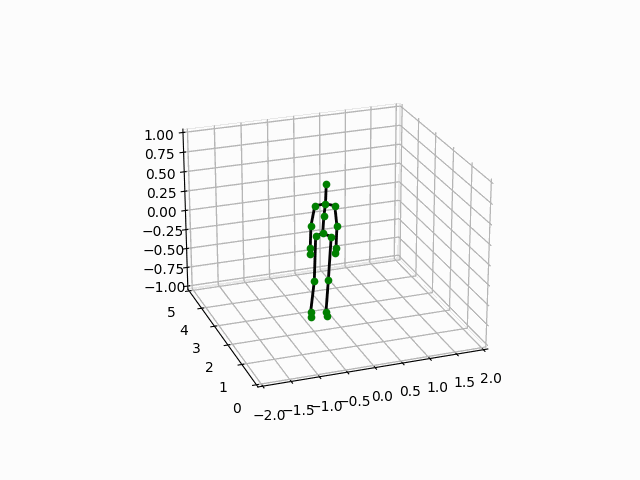

In [4]:
# plot a sequence
id_to_plot = 1
plot_skel(x, id_to_plot)
Image(open('out_/gifs/' + str(id_to_plot) + '.gif','rb').read())

In [5]:
def normalizeSkelSeq(seq):
    n_seq=seq
    min_x=np.amin(n_seq[:,:,0::3])
    min_y=np.amin(n_seq[:,:,1::3])
    min_z=np.amin(n_seq[:,:,2::3])
    max_x=np.amax(n_seq[:,:,0::3])
    max_y=np.amax(n_seq[:,:,1::3])
    max_z=np.amax(n_seq[:,:,2::3])
    n_seq[:,:,0::3]=2*((n_seq[:,:,0::3]-min_x)/(max_x-min_x))-1
    n_seq[:,:,1::3]=2*((n_seq[:,:,1::3]-min_y)/(max_y-min_y))-1
    n_seq[:,:,2::3]=2*((n_seq[:,:,2::3]-min_z)/(max_z-min_z))-1
    return n_seq

In [7]:
# Load subject labels
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/Y_s.npy
y_subjects = np.load('Y_s.npy')

# Filter data based on subjects
train_subjects = [1, 2, 3, 4, 5]
val_subjects = [6, 7]

train_indices = np.isin(y_subjects, train_subjects)
val_indices = np.isin(y_subjects, val_subjects)
test_indices = ~(train_indices | val_indices)

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

# Normalize data
x_train_normalized = normalizeSkelSeq(x_train)
x_val_normalized = normalizeSkelSeq(x_val)
x_test_normalized = normalizeSkelSeq(x_test)

# Train, validate, and test your model
# (You need to implement or use a machine learning model for this)


File ‘Y_s.npy’ already there; not retrieving.



In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Model

# Assuming your normalized data has the shape (num_samples, sequence_length, num_features)
# Adjust the input shape according to your data
sequence_length = x_train_normalized.shape[1]
num_features = x_train_normalized.shape[2]
num_classes = len(np.unique(y_train))  # Assuming y_train contains class labels

# Input layer
inputs = Input(shape=(sequence_length, num_features))

# LSTM layer with 24 hidden units
lstm_layer = LSTM(24)(inputs)

# Dropout layer with rate 0.5
dropout_layer = Dropout(0.5)(lstm_layer)

# Output layer
outputs = Dense(num_classes, activation='softmax')(dropout_layer)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38, 60)]          0         
                                                                 
 lstm (LSTM)                 (None, 24)                8160      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 20)                500       
                                                                 
Total params: 8660 (33.83 KB)
Trainable params: 8660 (33.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import os
import imageio
from IPython.display import Image

# ... (Your existing code)

# Load subject labels
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/Y_s.npy
y_subjects = np.load('Y_s.npy')

# Split data based on subject labels
train_subjects = [1, 2, 3, 4, 5]
val_subjects = [6, 7]

train_indices = np.where(np.isin(y_subjects, train_subjects))[0]
val_indices = np.where(np.isin(y_subjects, val_subjects))[0]
test_indices = np.setdiff1d(np.arange(len(y_subjects)), np.concatenate([train_indices, val_indices]))

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

# Normalize the skeleton sequences
x_train_normalized = normalizeSkelSeq(x_train)
x_val_normalized = normalizeSkelSeq(x_val)
x_test_normalized = normalizeSkelSeq(x_test)

# Display shapes of the datasets
print("Training set shapes:", x_train_normalized.shape, y_train.shape)
print("Validation set shapes:", x_val_normalized.shape, y_val.shape)
print("Test set shapes:", x_test_normalized.shape, y_test.shape)


File ‘Y_s.npy’ already there; not retrieving.

Training set shapes: (270, 38, 60) (270,)
Validation set shapes: (117, 38, 60) (117,)
Test set shapes: (180, 38, 60) (180,)


In [11]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Assuming you have loaded and preprocessed your data as x_train_normalized, y_train, x_val_normalized, y_val, x_test_normalized, y_test

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the LSTM model
model = Sequential()
model.add(LSTM(24, input_shape=(x_train_normalized.shape[1], x_train_normalized.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train_normalized, y_train_encoded, epochs=10, batch_size=32, validation_data=(x_val_normalized, y_val_encoded))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 24)                8160      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                500       
                                                                 
Total params: 8660 (33.83 KB)
Trainable params: 8660 (33.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
9/9 [==============================] - 5s 112ms/step - loss: 3.0194 - accuracy: 0.0556 - val_loss: 3.0059 - val_accuracy: 0.0513
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 3.0097 - accuracy: 0.0741 - val_loss: 3.0043 - val_accuracy: 0.0171
Epoch 3

In [12]:
# Train the model for 2000 epochs with a batch size of 256
history = model.fit(x_train_normalized, y_train_encoded, epochs=2000, batch_size=256, validation_data=(x_val_normalized, y_val_encoded))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/2000
2/2 [==============================] - 0s 113ms/step - loss: 2.8359 - accuracy: 0.1481 - val_loss: 2.9182 - val_accuracy: 0.1111
Epoch 2/2000
2/2 [==============================] - 0s 65ms/step - loss: 2.8335 - accuracy: 0.1370 - val_loss: 2.9117 - val_accuracy: 0.1282
Epoch 3/2000
2/2 [==============================] - 0s 139ms/step - loss: 2.8343 - accuracy: 0.1296 - val_loss: 2.9035 - val_accuracy: 0.1282
Epoch 4/2000
2/2 [==============================] - 0s 205ms/step - loss: 2.8518 - accuracy: 0.1296 - val_loss: 2.9094 - val_accuracy: 0.1197
Epoch 5/2000
2/2 [==============================] - 0s 71ms/step - loss: 2.8751 - accuracy: 0.1259 - val_loss: 2.9036 - val_accuracy: 0.1197
Epoch 6/2000
2/2 [==============================] - 0s 33ms/step - loss: 2.8430 - accuracy: 0.1037 - val_loss: 2.8832 - val_accuracy: 0.1111
Epoch 7/2000
2/2 [==============================] - 0s 34ms/step - loss: 2.7906 - accuracy: 0.1111 - val_loss: 2.8762 - val_accuracy: 0.1197
Epoch 8/20

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_encoded)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


6/6 [==============================] - 0s 7ms/step - loss: 2.8675 - accuracy: 0.4722
Test Loss: 2.8675
Test Accuracy: 47.22%


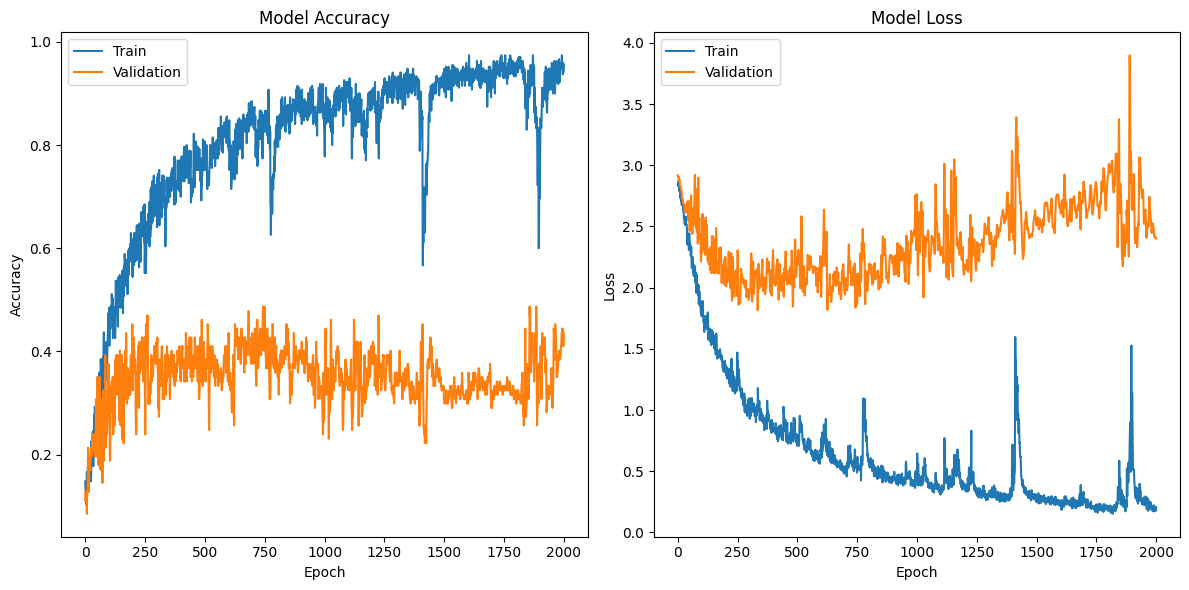

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Assuming you have loaded and preprocessed your data as x_train_normalized, y_train, x_val_normalized, y_val, x_test_normalized, y_test

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the new deeper LSTM model
model_deeper = Sequential()
model_deeper.add(LSTM(24, input_shape=(x_train_normalized.shape[1], x_train_normalized.shape[2]), return_sequences=True))
model_deeper.add(Dropout(0.5))
model_deeper.add(LSTM(24))  # Second LSTM layer without return_sequences
model_deeper.add(Dropout(0.5))
model_deeper.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile the model
model_deeper.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_deeper.summary()

# Train the deeper model
history_deeper = model_deeper.fit(x_train_normalized, y_train_encoded, epochs=2000, batch_size=256, validation_data=(x_val_normalized, y_val_encoded))

# Evaluate the deeper model on the test set
test_loss_deeper, test_accuracy_deeper = model_deeper.evaluate(x_test_normalized, y_test_encoded)
print(f'Deeper Model Test Accuracy: {test_accuracy_deeper * 100:.2f}%')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 38, 24)            8160      
                                                                 
 dropout_2 (Dropout)         (None, 38, 24)            0         
                                                                 
 lstm_3 (LSTM)               (None, 24)                4704      
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
Total params: 13364 (52.20 KB)
Trainable params: 13364 (52.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
2/2 [

6/6 [==============================] - 2s 6ms/step


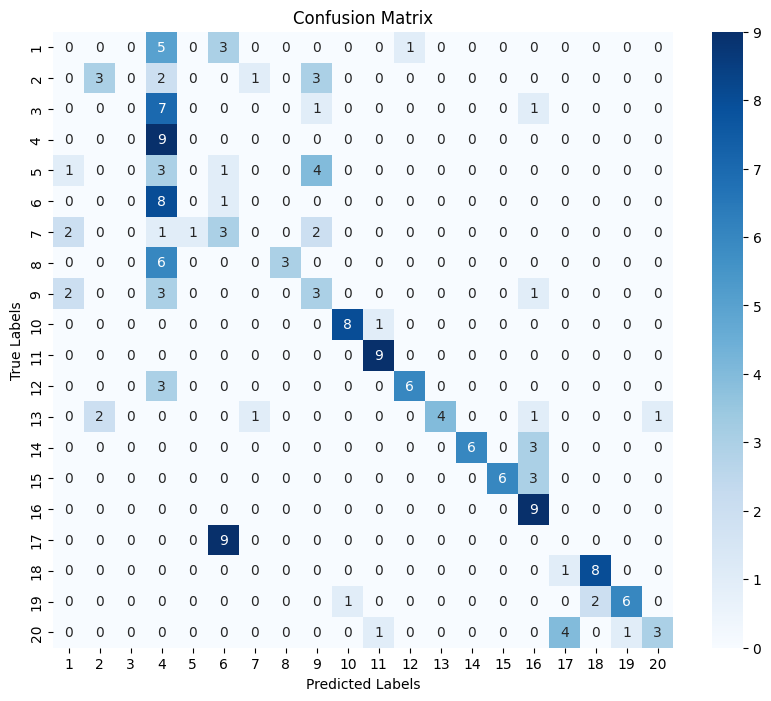

In [17]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Assuming you have loaded and preprocessed your data as x_train_normalized, y_train, x_val_normalized, y_val, x_test_normalized, y_test

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define and train your LSTM model (using the deeper model from the previous example)
# ...

# Evaluate the model on the test set
y_pred_prob = model_deeper.predict(x_test_normalized)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


9/9 [==============================] - 2s 12ms/step


ValueError: ignored

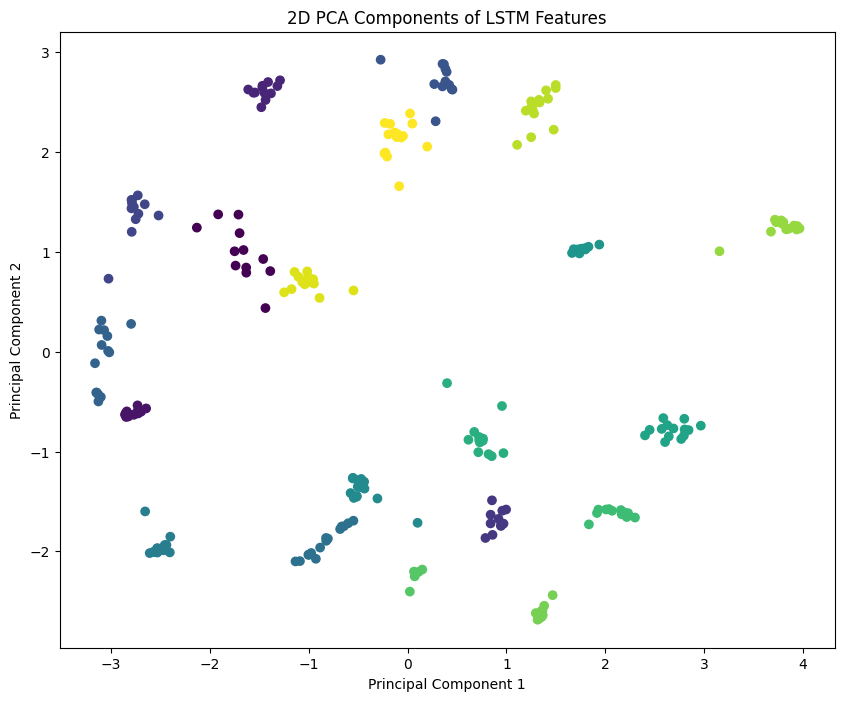

In [18]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Assuming you have loaded and preprocessed your data as x_train_normalized, y_train, x_val_normalized, y_val, x_test_normalized, y_test

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define the model (using the deeper model from the previous example)
# ...

# Create an intermediate model to get the output of the last LSTM layer
intermediate_model = Model(inputs=model_deeper.input, outputs=model_deeper.layers[-3].output)

# Get the features from the training set
features_train = intermediate_model.predict(x_train_normalized)

# Apply PCA to keep the two principal components
pca = PCA(n_components=2)
components = pca.fit_transform(features_train)

# Visualize the 2D components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(components[:, 0], components[:, 1], c=y_train_encoded, cmap='viridis')
plt.title('2D PCA Components of LSTM Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=label_encoder.classes_, title='Action Classes')
plt.show()


In [19]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense

# Assuming you have loaded and preprocessed your data as x_train_normalized, y_train, x_val_normalized, y_val, x_test_normalized, y_test

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Define the Bi-LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(24, return_sequences=True), input_shape=(x_train_normalized.shape[1], x_train_normalized.shape[2])))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Bidirectional(LSTM(24)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile the Bi-LSTM model
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_bilstm.summary()

# Train the Bi-LSTM model
history_bilstm = model_bilstm.fit(x_train_normalized, y_train_encoded, epochs=2000, batch_size=256, validation_data=(x_val_normalized, y_val_encoded))

# Evaluate the Bi-LSTM model on the test set
test_loss_bilstm, test_accuracy_bilstm = model_bilstm.evaluate(x_test_normalized, y_test_encoded)
print(f'Bi-LSTM Model Test Accuracy: {test_accuracy_bilstm * 100:.2f}%')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 38, 48)            16320     
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 38, 48)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 48)                14016     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                980       
                                                                 
Total params: 31316 (122.33 KB)
Trainable params: 3131

In [20]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense

# Assuming you have loaded and preprocessed your data as x_train_normalized, y_train, x_val_normalized, y_val, x_test_normalized, y_test

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Calculate the number of parameters in the LSTM model
lstm_model_params = model_deeper.count_params()

# Define the 1D CNN model with a similar number of parameters
model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train_normalized.shape[1], x_train_normalized.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile the CNN model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_cnn.summary()

# Train the CNN model
history_cnn = model_cnn.fit(x_train_normalized, y_train_encoded, epochs=200, batch_size=256, validation_data=(x_val_normalized, y_val_encoded))

# Evaluate the CNN model on the test set
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(x_test_normalized, y_test_encoded)
print(f'CNN Model Test Accuracy: {test_accuracy_cnn * 100:.2f}%')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 36, 32)            5792      
                                                                 
 max_pooling1d (MaxPooling1  (None, 18, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              